<a href="https://colab.research.google.com/github/NamanG0yal/NamanGoyal-Aries-Study/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.2MB/s]


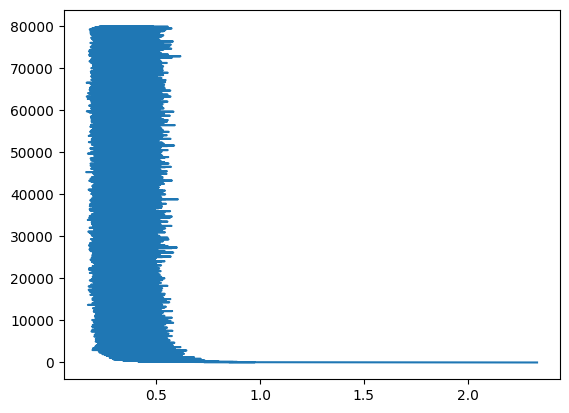

Accuracy is  84.07


In [ ]:
###Implementing the digit recognition model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
batch_size = 150
tr = torchvision.datasets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
ts = torchvision.datasets.FashionMNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)
tr_load = torch.utils.data.DataLoader(dataset=tr , batch_size = 150)
ts_load = torch.utils.data.DataLoader(dataset=ts , batch_size = 150)
input_size = 784
class model(nn.Module):
  def __init__(self, input_size):
    super(model,self).__init__()
    self.l1  = nn.Linear(input_size , 16)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(16 , 16  )
    self.sigmoid = nn.Sigmoid()
    self.l3 = nn.Linear(16 , 10)



  def forward(self , x):
      out = self.l1(x)
      out = self.relu(out)
      out = self.l2(out)
      out = self.sigmoid(out) # No activation in the end because cross entropy loss required so !
      out  = self.l3(out)
      return out
learning_rate  = 0.01
identifier = model(784 )
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(identifier.parameters() , lr = learning_rate)
total = len(tr_load)
x = []
y = []
total = 0
for epoch in range(200):
  for i , (images, labels) in enumerate(tr_load):
    total += 1
    y.append(total)
    images = images.reshape(-1 , 28 * 28  )
    outputs = identifier.forward(images)
    l =  loss(outputs , labels)
    l1 = l.detach().numpy()
    x.append(l1)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

# Plotting the loss function as a function of number of epochs
plt.plot(x , y)
plt.show()



with torch.no_grad():
  n_correct = 0
  n_samples = len(ts_load.dataset)
  for images , labels in ts_load:
    images  =  images.reshape(-1 , 28 * 28 )
    outputs = identifier(images)
    _, predicted = torch.max(outputs , 1)
    n_correct  += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print("Accuracy is " , 100 * acc)

#Lower epoch cycles resulted in poor results i believe since the model is not even trained at this point of time but i can't really help it